In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob

In [2]:
date = ['1/22', '1/23', '1/24', '1/25', '1/26', '1/27', '1/28', '1/29', '1/30', '1/31', 
        '2/1', '2/2', '2/3', '2/4', '2/5', '2/6', '2/7', '2/8', '2/9', '2/10',
        '2/11', '2/12', '2/13', '2/14', '2/15', '2/16', '2/17', '2/18', '2/19', '2/20',
        '2/21', '2/22', '2/23', '2/24', '2/25', '2/26', '2/27', '2/28', '2/29', 
        '3/1', '3/2', '3/3', '3/4', '3/5', '3/6', '3/7', '3/8', '3/9', '3/10',
        '3/11', '3/12', '3/13', '3/14', '3/15', '3/16', '3/17', '3/18', '3/19', '3/20', 
        '3/21', '3/22', '3/23', '3/24', '3/25', '3/26', '3/27', '3/28', '3/29', '3/30', '3/31', 
        '4/1', '4/2', '4/3', '4/4', '4/5', '4/6', '4/7', '4/8', '4/9', '4/10',
        '4/11', '4/12', '4/13', '4/14', '4/15', '4/16', '4/17', '4/18']

US_cases_minus_NY = pd.DataFrame(columns=['date', 'cumulative_cases'])

US_cases_minus_NY.date = date

US_cases_minus_NY.set_index('date')

,cumulative_cases
date,
1/22,NaN
1/23,NaN
1/24,NaN
1/25,NaN
1/26,NaN
1/27,NaN
1/28,NaN
1/29,NaN
1/30,NaN


In [3]:
cumulative_cases = []

filenames = sorted(glob('*2020a.txt'))
dataframes = [pd.read_csv(f) for f in filenames]

In [4]:
for dataframe in dataframes:
    d1 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d1 = d1.drop(d1[d1['Province/State'].str.contains('Princess')].index)
    cumulative_cases.append(d1['Confirmed'].sum())

In [5]:
filenames2 = sorted(glob('*2020b.txt'))
dataframes2 = [pd.read_csv(f) for f in filenames2]

for dataframe in dataframes2:
    d2 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d2 = d2.drop(d2[d2['Province/State'].str.contains('NY')].index)
    d2 = d2.drop(d2[d2['Province/State'].str.contains('Princess')].index)
    cumulative_cases.append(d2['Confirmed'].sum())

In [6]:
filenames3 = sorted(glob('*2020c.txt'))
dataframes3 = [pd.read_csv(f) for f in filenames3]

for dataframe in dataframes3:
    d3 = dataframe.loc[dataframe['Country/Region'] == 'US']
    d3 = d3.drop(d3[d3['Province/State'].str.contains('New York')].index)
    d3 = d3.drop(d3[d3['Province/State'].str.contains('Princess')].index)
    cumulative_cases.append(d3['Confirmed'].sum())

In [7]:
filenames4 = sorted(glob('*2020d.txt'))
dataframes4 = [pd.read_csv(f) for f in filenames4]

for dataframe in dataframes4:
    d4 = dataframe.loc[dataframe['Country_Region'] == 'US']
    d4 = d4.drop(d4[d4['Province_State'].str.contains('New York')].index)
    d4 = d4.drop(d4[d4['Province_State'].str.contains('Princess')].index)
    cumulative_cases.append(d4['Confirmed'].sum())

In [8]:
US_cases_minus_NY['cumulative_cases'] = cumulative_cases

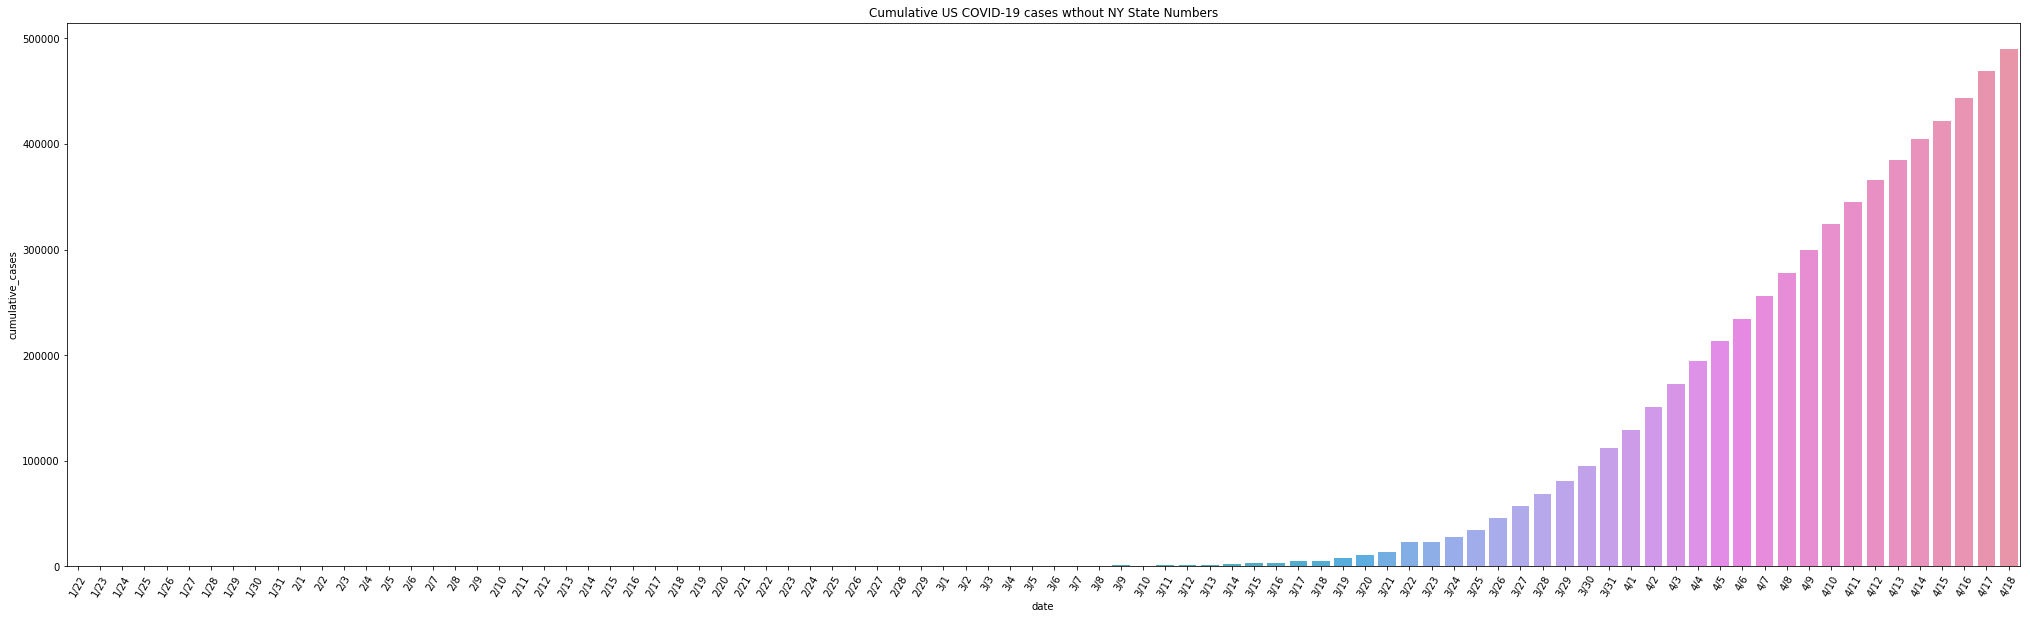

In [9]:
plt.figure(figsize=(35, 10))
US_cumulative_plot_no_NY = sns.barplot(x='date', y='cumulative_cases', data=US_cases_minus_NY)
plt.xticks(rotation=60)
plt.title('Cumulative US COVID-19 cases wthout NY State Numbers')
plt.savefig('Cumulative US COVID-19 cases wthout NY State Numbers')
plt.show()

In [10]:
US_cases_minus_NY['daily_new_cases'] = US_cases_minus_NY['cumulative_cases'].diff(1)

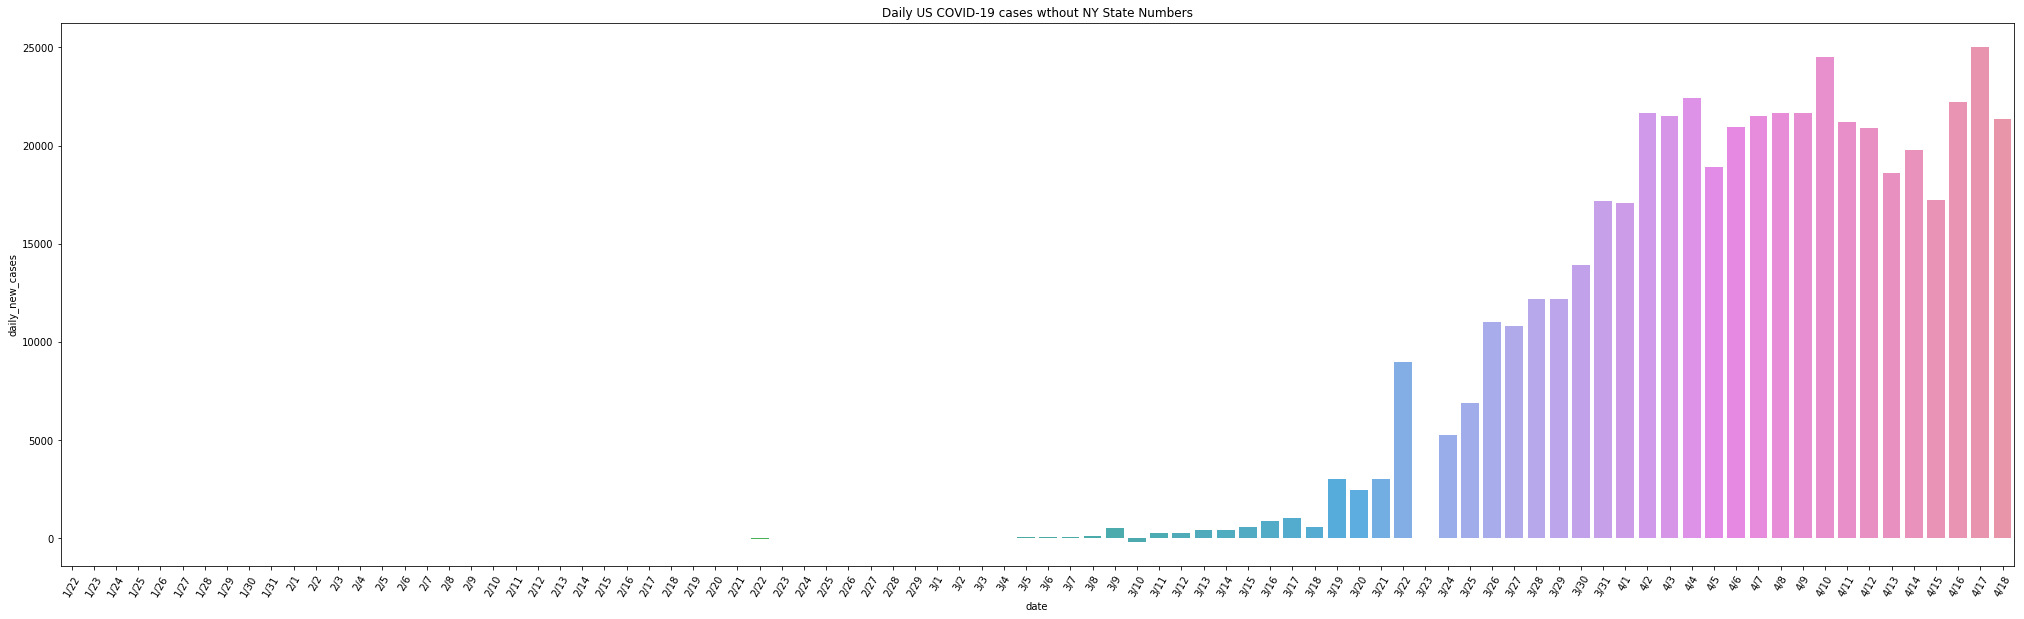

In [11]:
plt.figure(figsize=(35, 10))
US_daily_plot_no_NY = sns.barplot(x='date', y='daily_new_cases', data=US_cases_minus_NY)
plt.xticks(rotation=60)
plt.title('Daily US COVID-19 cases wthout NY State Numbers')
plt.savefig('Daily US COVID-19 cases wthout NY State Numbers')
plt.show()